 # Trabajo Final
Análisis exploratorio de datos

Jeziret Sahadi González Gallardo

Jorge Eduardo Cárdenas Arroyo

Leonardo Coronado Arvayo


# La base utilizada para este trabajo es de un estudio sobre depredación de semillas en la Reserva de la Biosfera Sierra de Manantlán. Contiene la descripción para tres sitios (gradientes altitudinales) dentro de la RBSM.

In [69]:
#importamos librerías

import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from libpysal import weights as ct
import pysal.lib.weights.set_operations as Wsets

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

In [64]:
#importamos la base de datos desde su ubicación

base = pd.read_csv("C:/Users/Jeziret/Documents/CentroGeo/III/Geoinformatica/Trabajo final/manantlal.csv")

# Exploración de tabla y datos general

In [3]:
#vemos lo que contienen los primeros registros de la base
base.head()

,Especie,Acronimo,Poblacion,Sitio,Paraje,Altitud,Exposicion,Pendiente_porc,Cantidad_Luz,N_Adultos,N_Juveniles,Tipo_vegetación,Posicion_topo,Este,Oeste,Fecha_caract,Observaciones
0,Q. nixoniana,Qnx,3,1,Almial,2159,NE,5.0,580.0,2.0,59.0,QQ,LA,578690,2163575,28-ene-19,NaN
1,Q. nixoniana,Qnx,3,2,Mirador,2100,SO,80.0,1140.0,1.0,0.0,PQ,LM,577007,2165135,28-ene-19,NaN
2,Q. nixoniana,Qnx,3,3,Mirador,2069,NO,40.0,203.0,4.0,1.0,QQ,LM,576986,2165383,28-ene-19,NaN
3,Q. nixoniana,Qnx,2,1,Corralitos,1830,SO,48.0,811.0,1.0,23.0,VS,LM,572733,2168350,27-ene-19,NaN
4,Q. nixoniana,Qnx,1,1,Puerto Martinez,1386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577159,2160893,NaN,NaN


In [4]:
base.dtypes

Especie             object
Acronimo            object
Poblacion            int64
Sitio                int64
Paraje              object
Altitud              int64
Exposicion          object
Pendiente_porc     float64
Cantidad_Luz       float64
N_Adultos          float64
N_Juveniles        float64
Tipo_vegetación     object
Posicion_topo       object
Este                 int64
Oeste                int64
Fecha_caract        object
Observaciones       object
dtype: object

In [65]:
#exploramos los nombres de las columnas de la base

base.columns

Index(['Especie', 'Acronimo', 'Poblacion', 'Sitio', 'Paraje', 'Altitud',
       'Exposicion', 'Pendiente_porc', 'Cantidad_Luz', 'N_Adultos',
       'N_Juveniles', 'Tipo_vegetación', 'Posicion_topo', 'Este', 'Oeste',
       'Fecha_caract', 'Observaciones'],
      dtype='object')

In [66]:
#algunos estadísticos generales de la base

base.describe()

,Poblacion,Sitio,Altitud,Pendiente_porc,Cantidad_Luz,N_Adultos,N_Juveniles,Este,Oeste
count,42.000000,42.000000,42.000000,38.000000,38.000000,38.000000,38.000000,42.000000,4.200000e+01
mean,2.238095,1.952381,1918.928571,30.289474,559.447368,3.894737,9.315789,576011.261905,2.165811e+06
std,0.758996,0.824987,240.650784,24.099914,470.035864,4.881235,15.237055,2786.169606,2.859935e+03
min,1.000000,1.000000,1154.000000,2.000000,10.000000,1.000000,0.000000,569955.000000,2.159429e+06
25%,2.000000,1.000000,1814.250000,10.750000,141.250000,1.000000,2.000000,573484.500000,2.163511e+06
50%,2.000000,2.000000,1957.000000,23.500000,381.500000,2.000000,4.000000,576074.000000,2.165784e+06
75%,3.000000,3.000000,2110.000000,43.750000,1066.000000,4.000000,10.000000,578510.000000,2.167995e+06
max,3.000000,3.000000,2300.000000,98.000000,1274.000000,20.000000,70.000000,581290.000000,2.171642e+06


In [67]:
#cuántos registros hay por especie

base.groupby(["Especie"]).count()

,Acronimo,Poblacion,Sitio,Paraje,Altitud,Exposicion,Pendiente_porc,Cantidad_Luz,N_Adultos,N_Juveniles,Tipo_vegetación,Posicion_topo,Este,Oeste,Fecha_caract,Observaciones
Especie,,,,,,,,,,,,,,,,
C. mocinnoi,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,1
P. hintonii,9,9,9,9,9,8,8,8,8,8,8,8,9,9,8,0
Q. nixoniana,7,7,7,7,7,4,4,4,4,4,4,4,7,7,4,0
Q. praineana,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1
Q. xalapensis,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1
S. ramirezii,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0


In [8]:
#¿qué especie recibe la mayor cantidad de luz?
base.groupby(["Especie"]).count().sort_values("Cantidad_Luz", ascending= False)


,Acronimo,Poblacion,Sitio,Paraje,Altitud,Exposicion,Pendiente_porc,Cantidad_Luz,N_Adultos,N_Juveniles,Tipo_vegetación,Posicion_topo,Este,Oeste,Fecha_caract,Observaciones
Especie,,,,,,,,,,,,,,,,
C. mocinnoi,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,1
P. hintonii,9,9,9,9,9,8,8,8,8,8,8,8,9,9,8,0
Q. praineana,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1
Q. xalapensis,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1
S. ramirezii,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
Q. nixoniana,7,7,7,7,7,4,4,4,4,4,4,4,7,7,4,0


In [9]:
#estas son las especies muestreadas de la base de datos
set(base.Especie)

{'C. mocinnoi',
 'P. hintonii',
 'Q. nixoniana',
 'Q. praineana',
 'Q. xalapensis',
 'S. ramirezii'}

In [45]:
#veremos si existe alguna correlación entre las columnas
base.corr()

#vemos que la correlación es baja en la mayoría de los casos

,Poblacion,Sitio,Altitud,Pendiente_porc,Cantidad_Luz,N_Adultos,N_Juveniles,Este,Oeste
Poblacion,1.000000,0.057501,0.862186,-0.121429,0.033897,-0.283349,0.140862,0.512782,-0.337921
Sitio,0.057501,1.000000,-0.008249,0.160104,-0.094383,0.053207,-0.333966,0.029282,-0.046425
Altitud,0.862186,-0.008249,1.000000,-0.160836,0.025537,-0.119404,0.155102,0.386857,-0.091694
Pendiente_porc,-0.121429,0.160104,-0.160836,1.000000,-0.252153,-0.008694,-0.182344,-0.067906,0.186243
Cantidad_Luz,0.033897,-0.094383,0.025537,-0.252153,1.000000,-0.344844,0.003165,-0.073265,-0.053168
N_Adultos,-0.283349,0.053207,-0.119404,-0.008694,-0.344844,1.000000,0.193417,-0.331632,0.250823
N_Juveniles,0.140862,-0.333966,0.155102,-0.182344,0.003165,0.193417,1.000000,0.069690,-0.074825
Este,0.512782,0.029282,0.386857,-0.067906,-0.073265,-0.331632,0.069690,1.000000,-0.852610
Oeste,-0.337921,-0.046425,-0.091694,0.186243,-0.053168,0.250823,-0.074825,-0.852610,1.000000


In [46]:
#asignamos colores a cada especie de la base para hacer gráficas más adelante

color = {"C. mocinnoi": "Red", "P. hintonii": "Yellow", "Q. nixoniana": "Blue", "Q. praineana": "Green", "Q. xalapensis": "Black", "S. ramirezii": "Aqua"}
especie_color = base.Especie.map(color)

# Juveniles
Haremos algunas tablas que muestren posibles correlaciones entre factores ambientales y la cantidad de juveniles

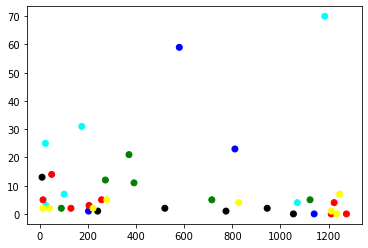

In [47]:
#hacemos un gráfico de dispersión de las especies que en el eje x tenga la cantidad de luz que recibe cada especie
#y en el eje "y" el número de juveniles
fig, ax = plt.subplots()
ax.scatter(base.Cantidad_Luz, base.N_Juveniles, color = especie_color)
plt.show()

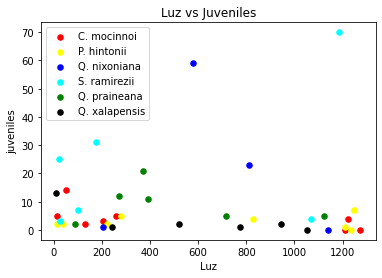

In [68]:
#cruzamos la variable cantidad de luz vs cantidad de juveniles, pero ahora agregamos la leyenda
fig, ax = plt.subplots()
for Especie in set (base.Especie):
    ax.scatter(
        base.Cantidad_Luz[base.Especie == Especie],
        base.N_Juveniles[base.Especie == Especie], 
        s= 30,
        c= color[Especie],
        label= Especie)
plt.legend()
plt.xlabel("Luz")
plt.ylabel("juveniles")
plt.title("Luz vs Juveniles")
plt.show()

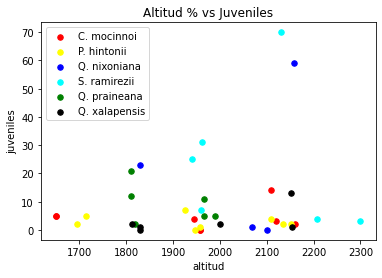

In [49]:
#ahora cruzamos la variable altitud vs cantidad de juveniles
fig, ax = plt.subplots()
for Especie in set (base.Especie):
    ax.scatter(
        base.Altitud[base.Especie == Especie],
        base.N_Juveniles[base.Especie == Especie], 
        s= 30,
        c= color[Especie],
        label= Especie)
plt.legend()
plt.xlabel("altitud")
plt.ylabel("juveniles")
plt.title("Altitud % vs Juveniles")
plt.show()


#Vemos que la S. Ramirezzi es la que más juveniles tienen alturas elevadas, presentando un pico en los 2100 metros y es la única
#especie presente hasta los 2300 m, empezando aparición a los 1950 aprox.

# P. hintonni juveniles distribuidos de manera más o menos uniforme entre los 1700 hasta los 2150
#La C. Mocinnoi por el contrario se encuentra a la más baja altura, a unos 1650 aprox. y hasta los 2150 pero con pocos juveniles.
# La Q. nixoniana tiene notorios juveniles entre los 1800 y hasta los casi 2200
#La Q praineana poco distribuida, únicamente presente entre los 1800 hasta los 2000
#Igualmente la Q. xalapensis desde los 1800 hasta los 2150

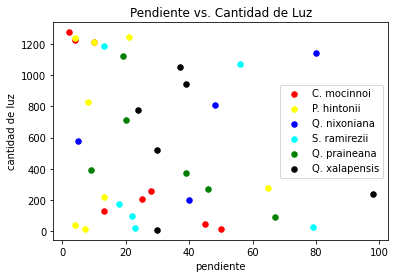

In [50]:
#ahora cruzamos la variable pendiente vs cantidad de luz
fig, ax = plt.subplots()
for Especie in set (base.Especie):
    ax.scatter(
        base.Pendiente_porc[base.Especie == Especie],
        base.Cantidad_Luz[base.Especie == Especie], 
        s= 30,
        c= color[Especie],
        label= Especie)
plt.legend()
plt.xlabel("pendiente")
plt.ylabel("cantidad de luz")
plt.title("Pendiente vs. Cantidad de Luz")
plt.show()

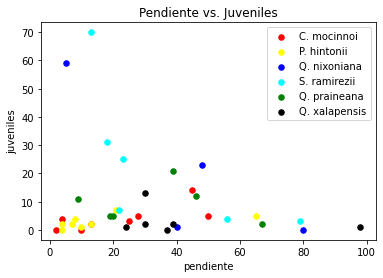

In [51]:
#ahora cruzamos la variable pendiente vs juveniles
fig, ax = plt.subplots()
for Especie in set (base.Especie):
    ax.scatter(
        base.Pendiente_porc[base.Especie == Especie],
        base.N_Juveniles[base.Especie == Especie], 
        s= 30,
        c= color[Especie],
        label= Especie)
plt.legend()
plt.xlabel("pendiente")
plt.ylabel("juveniles")
plt.title("Pendiente vs. Juveniles")
plt.show()

#En relación con la pendiente vemos una tendencia a la aglomeración de todas las especies con juveniles entre las pendientes
# desde el 5% hasta el 50% aproximadamente
#Resalta la Q xalapensis presente en pendientes muy abruptas

In [52]:
#máxima cantidad de juveniles

base["N_Juveniles"].max()

70.0

In [53]:
#mediana de altitud entre todas las especies muestreadas

base["Altitud"].median()

1957.0

In [54]:
#promedio de cantidad de lux recibida por las especies muestreadas

base["Cantidad_Luz"].mean()

559.4473684210526

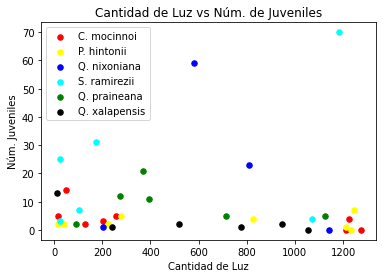

In [55]:
#volvemos a traer nuestro gráfico de dispersión de luz vs juveniles
fig, ax = plt.subplots()
for Especie in set (base.Especie):
    ax.scatter(
        base.Cantidad_Luz[base.Especie == Especie],
        base.N_Juveniles[base.Especie == Especie], 
        s= 30,
        c= color[Especie],
        label= Especie)
plt.legend()
plt.ylabel("Núm. Juveniles")
plt.xlabel("Cantidad de Luz")
plt.title("Cantidad de Luz vs Núm. de Juveniles")
plt.show()

In [56]:
#ahora calculamos la varianza de la cantidad de luz

base["Cantidad_Luz"].var()

220933.71337126594

# Adultos

In [58]:
#máxima cantidad de adultos

base["N_Adultos"].max()

20.0

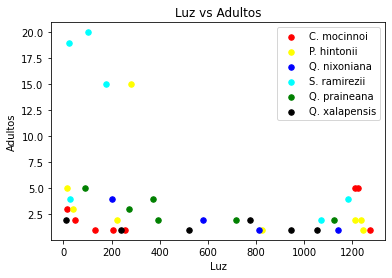

In [59]:
#cruzamos la variable cantidad de luz vs cantidad de adultos
fig, ax = plt.subplots()
for Especie in set (base.Especie):
    ax.scatter(
        base.Cantidad_Luz[base.Especie == Especie],
        base.N_Adultos[base.Especie == Especie], 
        s= 30,
        c= color[Especie],
        label= Especie)
plt.legend()
plt.xlabel("Luz")
plt.ylabel("Adultos")
plt.title("Luz vs Adultos")
plt.show()

#La S ramirezii destaca con gran cantidad de adultos con pocas cantidades de luz, aunque también presenta adultos con grandes cantidades de luz
# Se ve una primera aglomeración de adultos con bajas cantidades de luz y una segunda aglomeración con altas cantidades de luz
#en la parte central 

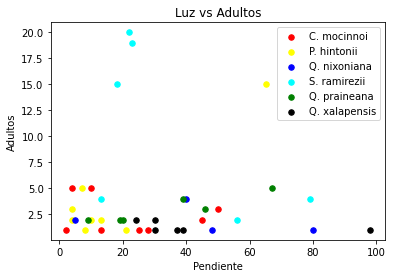

In [60]:
#cruzamos la variable pendiente vs cantidad de adultos
fig, ax = plt.subplots()
for Especie in set (base.Especie):
    ax.scatter(
        base.Pendiente_porc[base.Especie == Especie],
        base.N_Adultos[base.Especie == Especie], 
        s= 30,
        c= color[Especie],
        label= Especie)
plt.legend()
plt.xlabel("Pendiente")
plt.ylabel("Adultos")
plt.title("Luz vs Adultos")
plt.show()

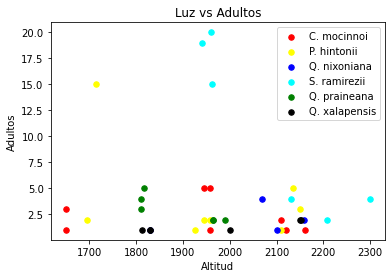

In [61]:
#cruzamos la variable altitud vs cantidad de adultos
fig, ax = plt.subplots()
for Especie in set (base.Especie):
    ax.scatter(
        base.Altitud[base.Especie == Especie],
        base.N_Adultos[base.Especie == Especie], 
        s= 30,
        c= color[Especie],
        label= Especie)
plt.legend()
plt.xlabel("Altitud")
plt.ylabel("Adultos")
plt.title("Luz vs Adultos")
plt.show()